## **Kernel Trick in Support Vector Classifier (SVC)**

### **1. Why Do We Need the Kernel Trick?**
- In **real-world problems**, data is often **not linearly separable** in the given feature space.
- A **linear decision boundary** may not effectively classify the data.
- The **Kernel Trick** allows us to project data into a **higher-dimensional space** where it becomes **linearly separable** without explicitly computing the transformation.

---

### **2. Transforming Data to a Higher-Dimensional Space**
We define a **mapping function** \( \phi(x) \) that transforms data from the original space to a **higher-dimensional space**:

$$
x \in \mathbb{R}^d \quad \rightarrow \quad \phi(x) \in \mathbb{R}^D, \quad D \gg d
$$

However, explicitly computing \( \phi(x) \) can be computationally expensive. Instead, we use the **Kernel Trick** to compute **dot products in the higher-dimensional space directly**.

---

### **3. The Kernel Function**
A **Kernel function** \( K(x_i, x_j) \) computes the **dot product** in the transformed space without explicitly applying \( \phi(x) \):

$$
K(x_i, x_j) = \phi(x_i)^T \phi(x_j)
$$

Using **Kernel Trick**, we replace all dot products \( x_i^T x_j \) in the SVM formulation with \( K(x_i, x_j) \), **avoiding explicit transformation**.

---

### **4. SVM Optimization with Kernel Trick**
The **dual problem** of SVM (Soft Margin) is:

$$
W(\alpha) = \sum_{i=1}^{N} \alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j K(x_i, x_j)
$$

subject to:

$$
\sum_{i=1}^{N} \alpha_i y_i = 0, \quad 0 \leq \alpha_i \leq C
$$

where we have replaced \( x_i^T x_j \) with \( K(x_i, x_j) \).

The **decision function** also changes to:

$$
f(x) = \text{sign} \left( \sum_{i=1}^{N} \alpha_i y_i K(x_i, x) + b \right)
$$

---

### **5. Common Kernel Functions**
Different kernel functions allow us to transform data in different ways:

#### **1. Linear Kernel** (Same as Hard Margin SVM)
$$
K(x_i, x_j) = x_i^T x_j
$$

- Equivalent to standard **linear SVM**.
- Used when data is **already linearly separable**.

#### **2. Polynomial Kernel**
$$
K(x_i, x_j) = (x_i^T x_j + c)^d
$$

- Maps data into a **higher-degree polynomial space**.
- \( d \) controls the degree of non-linearity.

#### **3. Radial Basis Function (RBF) Kernel (Gaussian Kernel)**
$$
K(x_i, x_j) = \exp \left( -\frac{\|x_i - x_j\|^2}{2\sigma^2} \right)
$$

- Maps data into **infinite-dimensional space**.
- Good for capturing **complex, non-linear relationships**.

#### **4. Sigmoid Kernel**
$$
K(x_i, x_j) = \tanh(\beta x_i^T x_j + c)
$$

- Inspired by **neural networks**.
- Less commonly used than RBF and polynomial kernels.

---

### **6. Choosing the Right Kernel**
| Kernel | Use Case |
|--------|----------|
| **Linear Kernel** | When data is **already separable** in original space. |
| **Polynomial Kernel** | When relationships are **non-linear but polynomial-like**. |
| **RBF Kernel** | When data has **complex decision boundaries**. |
| **Sigmoid Kernel** | Rarely used, similar to **neural networks**. |

---

### **7. Summary**
1. **Kernel Trick** allows SVMs to handle **non-linearly separable data** by implicitly mapping it to a **higher-dimensional space**.
2. **Instead of computing \( \phi(x) \) explicitly**, we use a **kernel function** \( K(x_i, x_j) = \phi(x_i)^T \phi(x_j) \).
3. **Common kernels**: Linear, Polynomial, RBF, Sigmoid.
4. **RBF Kernel** is the most widely used for **complex decision boundaries**.

This is how **Kernel Trick** enhances SVMs for non-linear classification! 🚀


### **Important Parameters of SVM in Scikit-Learn**  

Scikit-Learn provides the `SVC` class for **Support Vector Classification** and `SVR` for **Support Vector Regression**. Here are the most important parameters in `sklearn.svm.SVC()` that control the behavior of an SVM model.

## **Important Parameters of SVM in Scikit-Learn**
Scikit-Learn provides an efficient implementation of **Support Vector Machines (SVM)** through `sklearn.svm.SVC()`. Below are the key parameters that control **model complexity, kernel choice, regularization, and margin settings**.

---

### **1. `C` (Regularization Parameter)**
**Controls the trade-off between margin maximization and misclassification.**
- **Higher `C`**: Less tolerance for misclassification (tries to classify all points correctly).
- **Lower `C`**: Larger margin with more tolerance for misclassification (better generalization).

#### **Example**
```python
from sklearn.svm import SVC
model = SVC(C=1.0)  # Default value


- **Small `C`**: Simpler model with wider margins.
- **Large `C`**: More complex model with smaller margins.

---

### **2. `kernel` (Kernel Function)**
**Defines the transformation function applied to the data to handle non-linearity.**
- `'linear'`: No transformation (useful when data is already separable).
- `'poly'`: Polynomial transformation.
- `'rbf'`: Radial Basis Function (Gaussian kernel, default).
- `'sigmoid'`: Similar to a neural network activation function.

#### **Example**
```python
model = SVC(kernel='rbf')  # Default kernel
```

---

### **3. `degree` (Degree of Polynomial Kernel)**
- Only used when `kernel='poly'`.
- Defines the degree of the polynomial transformation.
- **Higher values** capture more complex relationships but can lead to overfitting.

#### **Example**
```python
model = SVC(kernel='poly', degree=3)  # Default is 3
```

---

### **4. `gamma` (Kernel Coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’)**
- **Controls the influence of a single training sample.**
- **Higher `gamma`**: More complex model (points have higher influence, risk of overfitting).
- **Lower `gamma`**: Simpler model (less influence per point, better generalization).

#### **Example**
```python
model = SVC(kernel='rbf', gamma='scale')  # Default is 'scale'
```
- `'scale'` (default) → $$\frac{1}{n \cdot \sigma^2}$$
- `'auto'` → $$\frac{1}{n}$$, where \( n \) is the number of features.

---

### **5. `coef0` (Independent Term in Polynomial and Sigmoid Kernels)**
- Controls the trade-off between **higher-degree and lower-degree** terms in the `poly` and `sigmoid` kernels.
- **Used only when `kernel='poly'` or `kernel='sigmoid'`.**

#### **Example**
```python
model = SVC(kernel='poly', coef0=0.0)  # Default value
```

---

### **6. `probability` (Enable Probability Estimates)**
- **If `True`**, enables probability estimates using cross-validation.
- **Increases computation time**.

#### **Example**
```python
model = SVC(probability=True)
```

---

### **7. `shrinking` (Use Shrinking Heuristic)**
- **Speeds up training** by reducing support vectors during optimization.
- Usually set to `True`.

#### **Example**
```python
model = SVC(shrinking=True)  # Default
```

---

### **8. `tol` (Tolerance for Stopping Criterion)**
- Defines the tolerance threshold for stopping the optimization.
- Lower values lead to **higher accuracy** but may slow down training.

#### **Example**
```python
model = SVC(tol=1e-3)  # Default value
```

---

### **9. `class_weight` (Handle Imbalanced Data)**
- Adjusts the weight of each class for imbalanced datasets.
- `class_weight='balanced'` assigns weights automatically based on class distribution.

#### **Example**
```python
model = SVC(class_weight='balanced')
```

---

### **10. `max_iter` (Maximum Number of Iterations)**
- Controls the number of iterations for the optimization algorithm.
- **Set to `-1` for no limit**.

#### **Example**
```python
model = SVC(max_iter=1000)  # Stop after 1000 iterations
```

---

## **Summary Table**
| Parameter | Description | Default |
|-----------|-------------|---------|
| `C` | Regularization parameter (trade-off between margin and misclassification) | `1.0` |
| `kernel` | Kernel function (`'linear'`, `'poly'`, `'rbf'`, `'sigmoid'`) | `'rbf'` |
| `degree` | Degree of polynomial kernel (only for `'poly'` kernel) | `3` |
| `gamma` | Kernel coefficient (`'scale'`, `'auto'`, or float) | `'scale'` |
| `coef0` | Independent term in polynomial and sigmoid kernels | `0.0` |
| `probability` | Enables probability estimates | `False` |
| `shrinking` | Use shrinking heuristic to speed up training | `True` |
| `tol` | Tolerance for stopping criterion | `1e-3` |
| `class_weight` | Adjusts class weights (`None` or `'balanced'`) | `None` |
| `max_iter` | Maximum iterations (`-1` means no limit) | `-1` |

---

## **Conclusion**
- `C`, `kernel`, and `gamma` are the most crucial parameters to **tune** for best performance.
- Use **RBF kernel** for non-linearly separable data.
- Set `class_weight='balanced'` when handling **imbalanced data**.
- Adjust `tol` and `max_iter` for **faster convergence**.

---

## **Example: Using SVM with Scikit-Learn**
```python
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a dataset
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model with RBF kernel
svm_model = SVC(C=1.0, kernel='rbf', gamma='scale', probability=True)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
```

This ensures your **SVM model is well-tuned** for real-world applications! 🚀
```

---

### **How to Use It in Jupyter Notebook**
- Copy and paste the **Markdown code** into a **Markdown cell** in Jupyter Notebook.
- Run the cell to see the **properly formatted explanation** with equations.

Let me know if you need further clarifications! 🚀

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

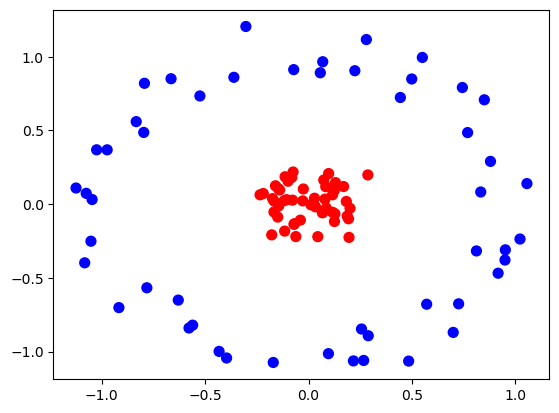

In [30]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [32]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.35

In [34]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\tbaka\AppData\Local\Temp\ipykernel_8316\2718072598.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


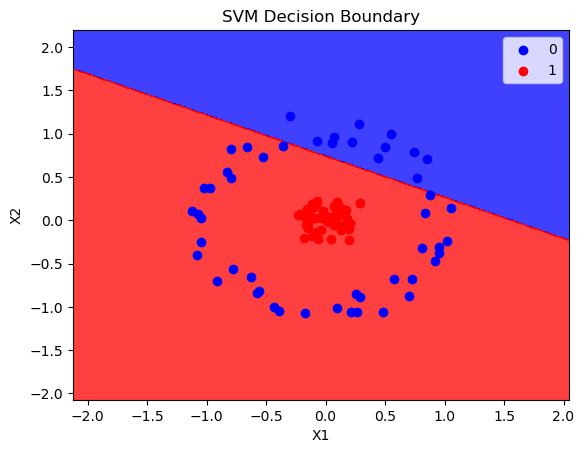

In [35]:
plot_decision_boundary(X, y, classifier)

In [37]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

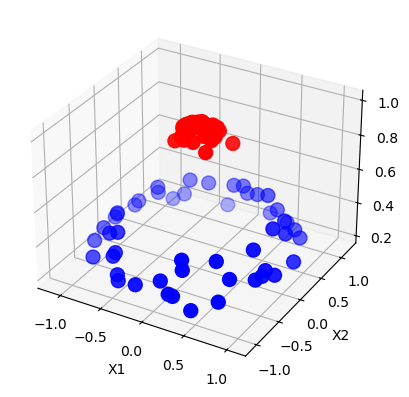

In [38]:
plot_3d_plot(X,y)

In [39]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\tbaka\AppData\Local\Temp\ipykernel_8316\2718072598.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


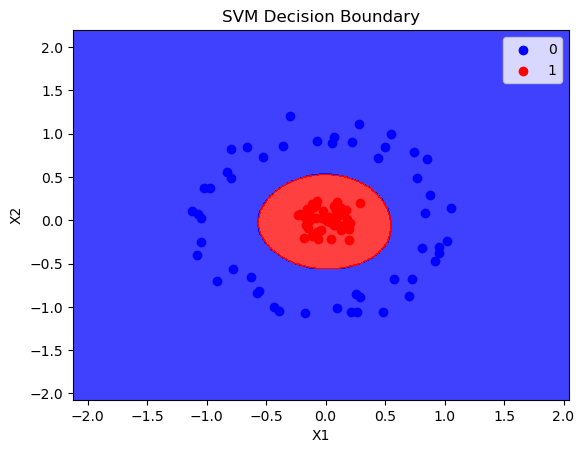

In [41]:
plot_decision_boundary(X, y, rbf_classifier)

In [42]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [43]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\tbaka\AppData\Local\Temp\ipykernel_8316\2718072598.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


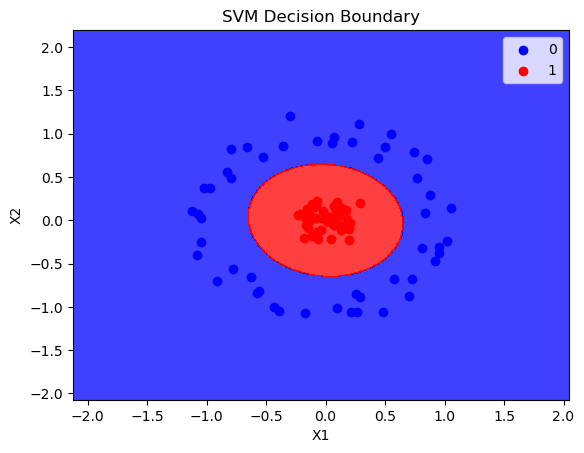

In [44]:
plot_decision_boundary(X, y, poly_classifier)

In [18]:
X

array([[ 5.20450644e-02,  5.22982862e-02],
       [ 9.19934426e-02,  1.85871834e-01],
       [-3.17932521e-01,  2.06005774e-01],
       [-2.50011702e-02, -1.50525306e-01],
       [ 1.00718588e-01,  1.25870037e-01],
       [ 9.36965592e-01,  5.58957552e-01],
       [-1.56045575e-01,  1.61988948e-01],
       [-1.85786291e-01, -1.04444625e-01],
       [-4.03841504e-01, -8.28175312e-01],
       [-1.05002225e+00, -3.60879610e-01],
       [ 1.37684895e-01,  9.09722501e-01],
       [ 6.02983645e-01, -7.03335609e-01],
       [-1.02335841e+00,  2.67574168e-01],
       [ 1.36789966e-02,  2.47261180e-01],
       [ 9.59462426e-01,  5.50583793e-03],
       [-2.27236886e-01, -2.36702300e-01],
       [-1.51281563e-02,  1.05012611e-01],
       [-9.09500389e-01,  2.40735735e-01],
       [-3.06225182e-01, -4.52350786e-02],
       [-1.00789583e-02, -3.41381031e-02],
       [ 2.51307477e-01,  2.10693652e-01],
       [ 3.28709604e-02,  1.51260454e-01],
       [-1.30258225e-01, -2.63259195e-01],
       [ 2.

In [19]:
np.exp(-(X**2)).sum(1)

array([1.9945636 , 1.95761456, 1.86230926, 1.97697203, 1.97418862,
       1.14731724, 1.95004472, 1.95522296, 1.35316613, 1.20991433,
       1.41832066, 1.30494207, 1.28180401, 1.94050623, 1.39826237,
       1.89518659, 1.9888041 , 1.38096953, 1.90844451, 1.99873369,
       1.89537661, 1.97630011, 1.91621761, 1.9198599 , 1.98326327,
       1.41695492, 1.31748395, 1.96596285, 1.98636339, 1.24314262,
       1.34397161, 1.99823093, 1.32385752, 1.26051945, 1.95591015,
       1.47910471, 1.9111386 , 1.96597851, 1.97300753, 1.40894248,
       1.96679684, 1.26319757, 1.89838658, 1.97079279, 1.41255087,
       1.38335256, 1.98009896, 1.98432035, 1.99945129, 1.47403654,
       1.27476086, 1.06725474, 1.944491  , 1.29689185, 1.22219764,
       1.94152999, 1.39419104, 1.41185544, 1.94229396, 1.18257725,
       1.47749643, 1.28435056, 1.38732298, 1.37483184, 1.2338368 ,
       1.95658432, 1.9637077 , 1.9671104 , 1.99372428, 1.97425968,
       1.96018298, 1.95277417, 1.31073179, 1.98713284, 1.93943

In [20]:
X_new=np.exp(-(X**2))

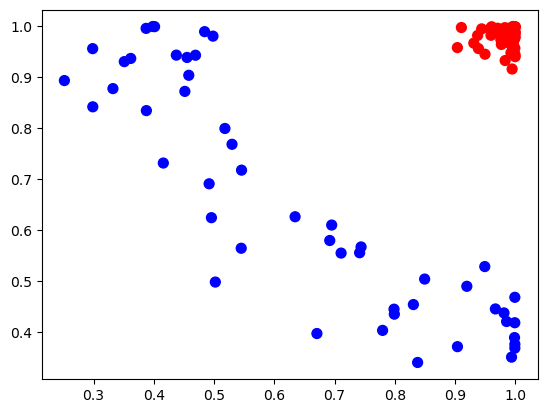

In [21]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')